# zomato data analysis project

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create the data frame

In [2]:
df = pd.read_csv("Zomato data .csv")

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Convert the data type of column - rate

In [6]:
 def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# summary of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# conclusion - there is no null value in dataframe.

# Type of Resturant

Text(0.5, 0, 'type of resturent')

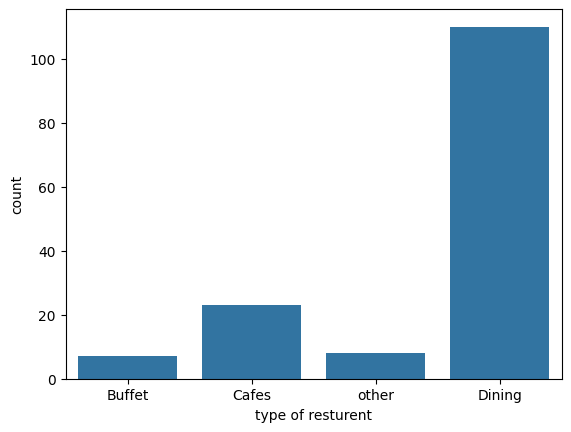

In [9]:
sns.countplot(x = df["listed_in(type)"])
plt.xlabel("type of resturent")

# Conclusion: The majority of the restaurantes fall into the dining category.

# Dining restaurants are preferred by a larege number of individuals.

Text(0, 0.5, 'votes')

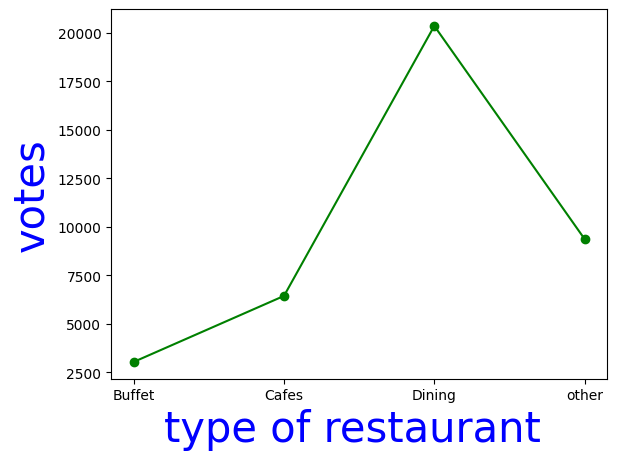

In [19]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("type of restaurant ", c="blue", size=30)
plt.ylabel("votes", c ="blue", size=30)

# Conclusion: dinning resturants has recieved maximum votes

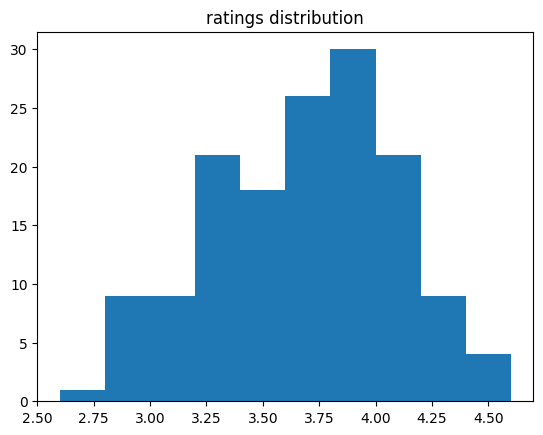

In [21]:
plt.hist(df['rate'],bins= 10)
plt.title("ratings distribution")
plt.show()

# conclusion: the majority resturants received ratings from 3.5 to 4

# Average order spending by couples

couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

 # conclusion : the majority of couple preferr resturants with an approximate cost of 300 rupees

# which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

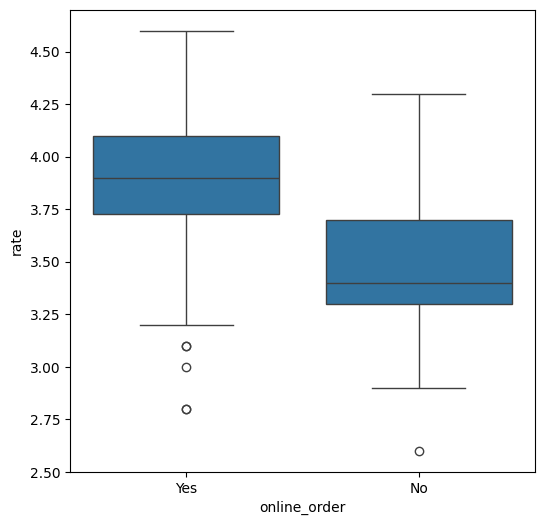

In [23]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = "rate", data = df)

# Conclusion : offline order received lower rating in comparision to online order, which obtained excellent ratings.

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


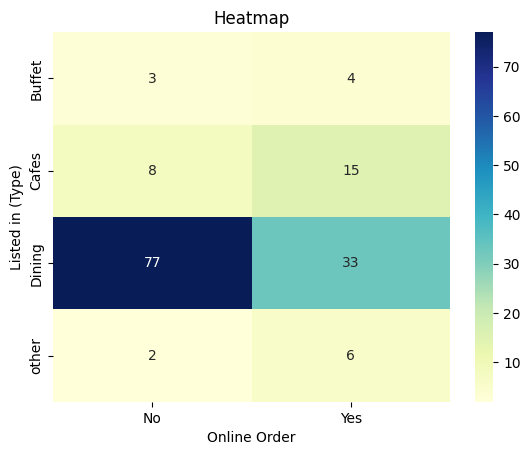

In [32]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()